# Data Wrangling Part 2 - Numpy Part 1

The following report was submitted as part of my Master of Data Science coursework on Data Wrangling. This report is the second in a five part series where I showcase work on various topics relating to Data Wrangling. This report is the first of two reports on the popular library Numpy where I use this library to investigate and present financial time-series data. 

This report also briefly covers important data analysis concepts such as descriptive statistics and visualizations, and outliers. I also demonstrate how Numpy can be used to simplify your analyses by eliminating the need to write long custom boilerplate code. 

## Working with *numpy* Vectors (Unidimensional Data)


&emsp; **Author:** Daniel Gladman <br>
&emsp; **Originally Written:** 2023-03-06 <br>


This report will use Bitcoin time series data to explore the concepts of descriptive statistics, creating and labeling unidimensional plots (with a focus on boxplots), and analysing outliers. The data used in this report was downloaded from Yahoo Finance and was cleaned prior to inclusion.

### Libraries
First the libraries used in this task shall be imported.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Matplotlib is a python library that shall be used to generate visual representations of the data. 

Numpy is a popular python library that performs fast numerical operations on both vectors and matrices of numerical data. This library will be used to generate the answers to the tasks of this report.

### Downloading and loading the data

First, numpy is used to load in the data. The data consists of Bitcoin's (BTC-USD) closing prices commencing from 01-01-2022 until the present date at the time of writing this report. Prior to loading in the data, all column headers and text were removed from the downloaded file, such that only to closing price values remained.

In [2]:
rates = np.loadtxt("./data/BTC-USD.csv")
rates[:50]

array([47686.8125  , 47345.21875 , 46458.117188, 45897.574219,
       43569.003906, 43160.929688, 41557.902344, 41733.941406,
       41911.601563, 41821.261719, 42735.855469, 43949.101563,
       42591.570313, 43099.699219, 43177.398438, 43113.878906,
       42250.550781, 42375.632813, 41744.328125, 40680.417969,
       36457.316406, 35030.25    , 36276.804688, 36654.328125,
       36954.003906, 36852.121094, 37138.234375, 37784.332031,
       38138.179688, 37917.601563, 38483.125   , 38743.273438,
       36952.984375, 37154.601563, 41500.875   , 41441.164063,
       42412.433594, 43840.285156, 44118.445313, 44338.796875,
       43565.113281, 42407.9375  , 42244.46875 , 42197.515625,
       42586.917969, 44575.203125, 43961.859375, 40538.011719,
       40030.976563, 40122.15625 ])

The above code illustrates what a 1-dimensional numpy array looks like. Due to limits on the amount of data that can be printed to the terminal, fifty closing prices, beginning from 01-01-22, are printed to the terminal.  

To understand how many prices are evident in the dataset, the following code can be run.

In [3]:
rates.shape

(424,)

The above results show the number of rows present in the data. Because the data is unidimensional, the number of columns is left blank.

### Generating Basic Descriptive Statistics

For the 2022 data only (the first 365 days), numpy was used to generate the mean, minimum value, quartiles, maximum value, standard deviation and interquartile range.

In [4]:
rates_2022 = rates[:365]

# Compute the required summary statistics
btc_mean = np.mean(rates_2022)
btc_min = min(rates_2022)
btc_Q1 = np.quantile(rates_2022, 0.25)
btc_median = np.median(rates_2022)
btc_Q3 = np.quantile(rates_2022, 0.75)
btc_max = max(rates_2022)
btc_sd = np.std(rates_2022)
btc_IQR = btc_Q3 - btc_Q1

# Print summmary report

print(f"""
BITCOIN - USD 2022 Closing Price Summary Statistics

Mean: {btc_mean}
Minimum: {btc_min}
First Quartile: {btc_Q1}
Median: {btc_median}
Third Quartile: {btc_Q3}
Maximum: {btc_max}
Standard Deviation: {btc_sd}
Interquartile Range: {btc_IQR}

""")


BITCOIN - USD 2022 Closing Price Summary Statistics

Mean: 28197.754098964386
Minimum: 15787.28418
First Quartile: 19546.849609
Median: 23164.628906
Third Quartile: 39105.148438
Maximum: 47686.8125
Standard Deviation: 10184.056270815585
Interquartile Range: 19558.298828999996




The results show the descriptive statistics of Bitcoin's observed closing prices during 2022. Based on the difference between the median and mean, there is likely to be some right tail skew of the data, meaning that there may be a few large closing price values that are pulling the mean value higher. 

### Plotting the Closing Prices: Line Graph

Next, a line graph representing a time series of the 2022 Bitcoin closing prices was generated using the Matplotlib python library.

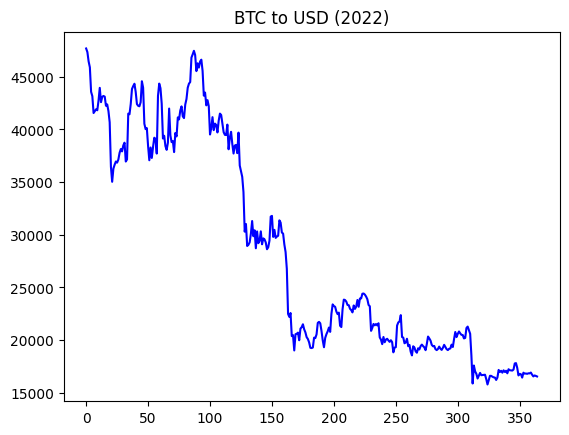

In [5]:
plt.plot(rates_2022, color="blue")
plt.title("BTC to USD (2022)")
plt.show()

The graph shows an overall decreasing trend of Bitcoin's closing prices during 2022, with a sharp decline occuring between approximately days 90 and 160. 

An interesting point to note is that during the time series, the closing price approximates the average closing price of 2022 for only a very short period in the year (roughly between days 125 and 150). For the remainder of the year, the closing price was either well above, or well below the average price. This means that in this particular instance, to be able to understand and explain time series data, the mean price alone does not appear to be a useful aggregation metric on its own. 

### Plotting Price Changes: Boxplots

Next, instead of further analysing the observed closing prices, the differences between each price and its subsequent closing price were computed and plotted as a boxplot. 

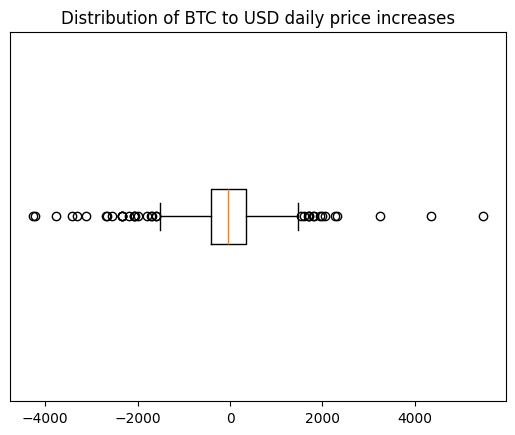

In [6]:
plt.boxplot(np.diff(rates_2022), vert=False)
plt.yticks([])
plt.title("Distribution of BTC to USD daily price increases")
plt.show()

The above plot shows the range of price changes during 2022. 

The first notable piece of information that can be gleaned from the boxplot is the median, which is represented by the red line in the middle of the box. In this example, the red line appears around the 0 mark, meaning 50% of the price changes are either side of zero.

The box portion captures the interquartile range (IQR), which represents the range where 50% of the data falls within. This means that 50% of the time, the price change is going to occur within this range.

Next the tails, or whiskers, the boxplot represent the boundary from where extreme values or outliers begin to occur. These boundaries are computed by multiplying the IQR by 1.5, with any values exceeding these upper and lower boundaries being considered outliers (labeled as circles on the graph). 

Another inference that can be made from the boxplot is regarding the data distribution shape, in particular the skewness and symmetry of the data. The above boxplot shows that the separation between the IQR is balanced, meaning there is little skew present in the data distribution. The above box is mostly centred around zero, meaning that the price changes are mostly symmetrical. 

### Boxplots: Plotting the Arithmatic Mean

The following code segments will demonstrate how the arthimetic mean can be displayed on the boxplot.

#### Method 1: Combining two plots.
This method involved creating two different plots and combining them together into one single plot.

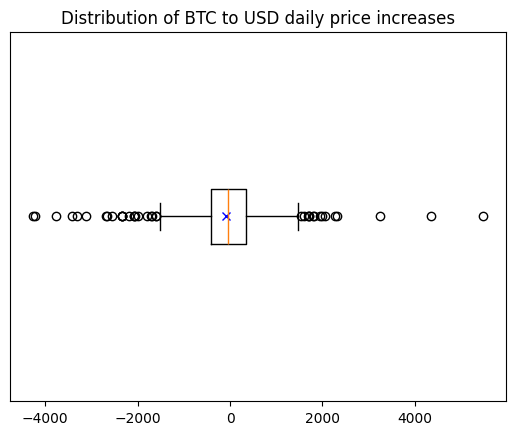

In [7]:
plt.boxplot(np.diff(rates_2022), vert=False)
plt.plot(np.mean(np.diff(rates_2022)), 1, marker="x", color="blue", markersize=6)
plt.yticks([])
plt.title("Distribution of BTC to USD daily price increases")
plt.show()

First the boxplot is created as it was before. Then on the next line, a separate plot for the arithmetic mean is created. Matplotlib is able to interpret that these two plots are to be combined and when "plt.show()" is called, a single combined plot is generated.

#### Method 2: Using boxplot arguments.
It's possible to generate the exact same graph without creating two seperate plots by instead using the built it arguments for the boxplot function.

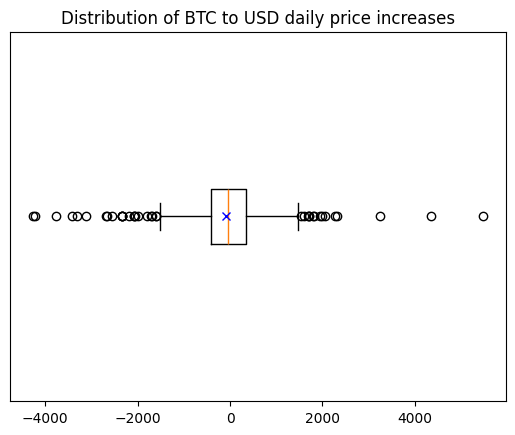

In [8]:
plt.boxplot(np.diff(rates_2022),
                    vert=False,
                    showmeans=True,
                    meanprops={"marker":"x", "markeredgecolor":"blue"})
plt.yticks([])
plt.title("Distribution of BTC to USD daily price increases")
plt.show()

Notice here that instead of creating a separate plot of the arithmetic mean, the arguments "showmeans" and "meanprops" (short for mean properties) are passed into the boxplot function. This allows the artihmetic mean to be displayed directly on the boxplot. The benefits are that a single additional line of unnecessary code is avoided.

### Finding when the Highest and Lowest Price Occur in a Time Series

This section will explore a number of methods to find the highest and lowest price in a time series.

#### Method 1: Custom Function

As demonstrated earlier, it is relatively easy to determine what the highest and lowest closing price was in 2022 by using the inbuild min and max python functions. However, determining the days when the high and low price occurred is a little more complicated. There are no inbuilt base python functions that allow this informaiton to be derived from a time series, so a custom function will need to be defined such that the respective days can also be determined.

The following code will define the custom function, and in addition, will plot the respective days ontop of the time series graph generated earlier in this report.

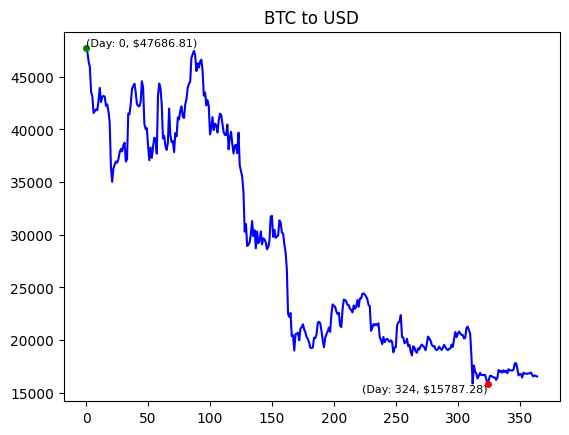

In [9]:
def findLowHighPriceDay(array) -> int:
    """
    Determines the day numbers (with 0 being the first day)
    with the lowest and highest observed prices in an array of
    prices. Algorithm achieves this in O(n) time and O(1) memory.   
    """

    max_price, min_price, low_day, high_day = None, None, None, None

    for day, price in enumerate(array):
        
        if not max_price and not min_price:
            max_price, min_price = price, price
            low_day, high_day = day, day 
        
        if price < min_price:
            min_price = price
            low_day = day
        
        if price > max_price:
            max_price = price
            high_day = day

    return low_day, high_day, min_price, max_price

# Find the required information
low_day, high_day, min_price, max_price = findLowHighPriceDay(rates_2022)

# Generate plot to demonstrate proof
plt.plot(rates_2022, color="blue")

# Add the markers
plt.plot(low_day, min_price, marker="o", color="red", markersize=4)
plt.plot(high_day, max_price, marker="o", color="green", markersize=4)

# Add labels to the markers
plt.text(low_day,
         min_price,
         f"(Day: {low_day}, ${round(min_price,2)})", size=8, ha="right", va="top")
plt.text(high_day,
         max_price,
         f"(Day: {high_day}, ${round(max_price,2)})", size=8, ha="left", va="bottom")

plt.title("BTC to USD")
plt.show()

As illustrated by the graph above, the custom function did a good job identifying when the high and low closing prices occured in the time series judging by the relative location of the dots on the trend line.

The way the above code works is that it makes one pass through the prices using a single for loop. Within this loop, a series of variables tracking the max/min prices and day counts are updated depending on whether the current close price in the iteration is a max/min price relative to all prices that have occured before it. If true, then the respective max/min price and day variable are updated. Once the loops ends, the relevant information is returned which can be assigned to variables and plotted on the line graph.

*Note: the algorithm always sets the first price in the series to be simultaneously the highest and lowest price assuming that the number of prices is >= 1. The algorithm does not consider edge cases where an empty array of prices is passed to it, but this could be addressed using a few additional lines of code.* 

#### Method 2: Using Numpy methods.

While there are no inbuilt python functions, fortunately Numpy provides options to achieve the same outcome in much less code. The following code chunks will demonstrate this.

In [10]:
low_day = np.argsort(rates_2022)[0]
high_day = np.argsort(rates_2022)[-1]
min_price = rates_2022[low_day]
max_price = rates_2022[high_day]
print(f'''
The highest price was ${round(max_price,2)} on day {high_day}.
The lowest price was ${round(min_price, 2)} on day {low_day}.
''')


The highest price was $47686.81 on day 0.
The lowest price was $15787.28 on day 324.



The above code produces the exact same output as the custom function, and the amount of lines required is four times less.

Numpy's argsort method is an interesting method that does not return the actual sorted array of prices, but rather it returns the respective indices of the orignial unsorted prices as if they were sorted. This is useful because we can use this output as a masking feature that allows for a sorted array of prices to be returned. To find the days where the lowest and highest price occur, one simply need to refer to the first and last elements returned by the argsort method. Furthermore, these results can then be used to extract the actual lowest and highest price.

While this is excelent, numpy also has more explicit methods that eliminate the need for slicing, as demonstrated below.

In [11]:
low_day = np.argmin(rates_2022)
high_day = np.argmax(rates_2022)
min_price = rates_2022[low_day]
max_price = rates_2022[high_day]
print(f'''
The highest price was ${round(max_price,2)} on day {high_day}. 
The lowest price was ${round(min_price, 2)} on day {low_day}.
''')


The highest price was $47686.81 on day 0. 
The lowest price was $15787.28 on day 324.



Here the same result is achieved using Numpy's argmin and argmax methods. This time, each respective method only return the index where the lowest and highest value exist in the array, thus removing the need to slice the output.

As additional exploratory exercise, the performance of each method shall be evaluated.

In [12]:
%%timeit
# The custom function method
low_day, high_day, min_price, max_price = findLowHighPriceDay(rates_2022)

25.2 µs ± 446 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [13]:
%%timeit
# Argsort method
low_day, high_day = np.argsort(rates_2022)[0], np.argsort(rates_2022)[-1]
min_price, max_price = rates_2022[low_day], rates_2022[high_day]

7.13 µs ± 72.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [14]:
%%timeit
# Argmin/ Argmax methods
low_day, high_day  = np.argmin(rates_2022), np.argmax(rates_2022)
min_price, max_price = rates_2022[low_day], rates_2022[high_day]

2.57 µs ± 36.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


According to the timeit tests, the results show that the Argmin/Argmax methods perform this task the fastest, followed by the Argsort method, and then finally the custom function which was considerably slower. This is an important factor to consider as while the current dataset is quite small, using custom functions can lead to severe performance issues on larger datasets. 



### Detecting and Counting Outliers

As before, this section will explore a number of methods to detect and count outliers. Outliers are an important concept in data analysis, and being able to identify and label outlier cases in a series of data can have a profound effect on the quality of the analysis and the insights derived from it. Outliers are not neccessarily erroneous entries (although they can be), and thus they cannot be automatically considered as invalid. Outliers simply refer to data points that appear to be further away from the other sampled data.

#### Method 1: Custom Function

Boxplots are a quick way to identify outliers as they usually appear as dots on either side of the whisker. However, there does not appear to be any inbuilt python functionality for counting outliers within a dataset, so a custom function must be defined. For this final section, the Boxplot IQR formula that is used to generate the dots on the boxplot will be utilized to count each outlier and report whether the outlier is a low or high outlier. 

In [15]:
def countOutliers(array) -> int:
    """
    This function will apply the 1.5 x IQR formula to
    count the number of outliers present on both sides of an array.
    The function assumes that the array has not been sorted.
    Excluding the sorting, the time complexity of the counting is O(n)
    with O(1) memory.
    
    """
    Q1, Q3 = np.quantile(array, 0.25), np.quantile(array, 0.75)
    IQR = Q3 - Q1
    low_threshold, high_threshold = Q1 - (IQR*1.5), Q3 + (IQR*1.5)
   
    low_outlier_count, high_outlier_count = 0, 0
    l, r = 0, len(array)-1
    array = np.sort(array)

    while l < r:
        if array[l] < low_threshold:
            low_outlier_count += 1
        
        if array[r] > high_threshold:
            high_outlier_count += 1
        l += 1

        r -= 1

    return low_outlier_count, high_outlier_count

low_outlier_count, high_outlier_count = countOutliers(np.diff(rates_2022))

print(f"""
In this array, there are a total of {low_outlier_count + high_outlier_count} outliers; 
with {low_outlier_count} outliers on the lower end and {high_outlier_count} outliers
on the higher end.
""")


In this array, there are a total of 38 outliers; 
with 23 outliers on the lower end and 15 outliers
on the higher end.



The above function appears to have successfully generated a short report on the outliers present in the data. The number of low and high outliers appears to look consistent with the boxplots generated earlier on in the report.

The code works by employing two pointer variables situated at the beginning and the end of the numpy array of data. Using a while loop, both pointers either increment or decrement by 1 after checking whether the value at their position can be classifed as an outlier using the Boxplot IQR formula. If it can, the respective high outlier and low outlier count will increase by 1. The left and right pointers will continue to increment and decrement until they crossover, which signals that the entire array has been traversed. The advantage of using the left and right pointer technique is that the high and low outliers can be counted seperately, with the left pointer focusing on low outliers and the right pointer can focus on high outliers. This is because a high outlier cannot occur on the left side of the array and vice-versa. The disadvantage from an algorithm perspective is that this code must sort the array first before beginning, however, sorting values is a requirement for generating a boxplot to begin with, so it is not an unreasonable step for the algorithm to take.

#### Method 2: Using Numpy methods

As before, the above function can be replicated using numpy methods. The following code chunks will demonstrate two ways this can be done with Numpy.

The first will be done utilizing the numpy.logical_or method.

In [16]:
Q1, Q3 = np.quantile(np.diff(rates_2022), 0.25), np.quantile(np.diff(rates_2022), 0.75)
IQR = Q3 - Q1
low_threshold, high_threshold = Q1 - (IQR*1.5), Q3 + (IQR*1.5)

mask = np.logical_or(np.diff(rates_2022) < low_threshold,
                      np.diff(rates_2022) > high_threshold)
outliers = np.diff(rates_2022)[mask]
low_outliers = outliers[outliers < 0]
high_outliers = outliers[0 < outliers]

print(f"""
In this array, there are a total of {len(outliers)} outliers; 
with {len(low_outliers)} outliers on the lower end and {len(high_outliers)} outliers
on the higher end.
""")


In this array, there are a total of 38 outliers; 
with 23 outliers on the lower end and 15 outliers
on the higher end.



Next, a logical indexing method is employed by passing in the criteria into the [] of the numpy array. 

In [17]:
Q1, Q3 = np.quantile(np.diff(rates_2022), 0.25), np.quantile(np.diff(rates_2022), 0.75)
IQR = Q3 - Q1
low_threshold, high_threshold = Q1 - (IQR*1.5), Q3 + (IQR*1.5)
outliers = np.diff(rates_2022)[ (high_threshold < np.diff(rates_2022)) | 
                               (np.diff(rates_2022) < low_threshold) ]

low_outliers = outliers[outliers < 0]
high_outliers = outliers[0 < outliers]

print(f"""
In this array, there are a total of {len(outliers)} outliers; 
with {len(low_outliers)} outliers on the lower end and {len(high_outliers)} outliers
on the higher end.
""")


In this array, there are a total of 38 outliers; 
with 23 outliers on the lower end and 15 outliers
on the higher end.



As shown above, the exact same results can be replicated using this code. But how do they perform?

In [18]:
%%timeit
low_outlier_count, high_outlier_count = countOutliers(np.diff(rates_2022))

138 µs ± 3.12 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [19]:
%%timeit
mask = np.logical_or(np.diff(rates_2022) < low_threshold,
                    np.diff(rates_2022) > high_threshold)
outliers = np.diff(rates_2022)[mask]
low_outliers = outliers[outliers < 0]
high_outliers = outliers[0 < outliers]

12.7 µs ± 549 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [20]:
%%timeit
outliers = np.diff(rates_2022)[ (high_threshold < np.diff(rates_2022)) |
                                (np.diff(rates_2022) < low_threshold) ]
low_outliers = outliers[outliers < 0]
high_outliers = outliers[0 < outliers]

12.7 µs ± 126 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


The results show that the custom function was considerably slower than the numpy methods for counting outliers.  However, between the two numpy methods, there appears to be no difference between the two in terms of performance, and based on the +- statistics, it is near certain that there would be no statistical difference between the two. In terms of which is preferable will depnd on personal taste, in my view, I prefer the logical_or method as it feels more intuitive, is easier to read, and may be less prone to errors as there is no requirement for remebering extra parentheses when writing the solution.

### Conclusion
In summary, this report explored descriptive statistics, creating and labeling plots, and analysing outliers all using a unidimensional dataset all using Numpy. Without the help of Numpy, much of this analysis would not be possible. Even the standard inbuilt math library in python cannot return many of the descriptive statistics explored in this report.

The key finding in this report is the power of numpy and its methods for performing sorting and searching functions. The performance of these methods is far superior than basic python and the importance of this cannot be understated when dealing with larger datasets.

There are a number of other interesting analyses that can be performed on time series data that this report did not cover, including autocorrelation, curve fitting and forecasting. Each of these analyses are possible with Numpy, or in combination with other python libraries.